In [110]:
import pandas as pd

# Load the dataset
file_path = '../data/raw/land_use_data.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df[:5]

,Period,Subdivision,Cropland_pct,Grassland_pct,Forest_pct,Wetland_pct,Cropland_area,Grassland_area,Forest_area,Wetland_area,Biodiversity_Score
0,Year-2000,Subdivision_1,48.423590,22.447908,17.976951,NaN,4842.358998,2244.790823,1797.695130,NaN,0.482540
1,Year-2001,Subdivision_1,51.335362,22.963853,17.747514,NaN,5133.536248,2296.385289,1774.751423,NaN,0.463808
2,Year-2002,Subdivision_1,51.479157,22.624337,17.708999,NaN,5147.915682,2262.433700,1770.899942,NaN,0.463585
3,Year-2003,Subdivision_1,51.392751,20.299837,17.129947,NaN,5139.275142,2029.983661,1712.994723,NaN,0.468174
4,Year-2004,Subdivision_1,51.475015,22.063842,17.344408,NaN,5147.501494,2206.384233,1734.440775,NaN,0.464367


In [111]:
# Check the data types of the columns
df.dtypes

Period                 object
Subdivision            object
Cropland_pct          float64
Grassland_pct         float64
Forest_pct            float64
Wetland_pct           float64
Cropland_area         float64
Grassland_area        float64
Forest_area           float64
Wetland_area          float64
Biodiversity_Score    float64
dtype: object

In [112]:
# Clean up Year data and transform it into datetime format
df['Year'] = df['Period'].str[-4:].astype(int)
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Rearrange Year column as the first column
df = df[['Year'] + [col for col in df.columns if col != 'Year']]

# Remove the Period column
df = df.drop(columns=['Period'])

# Remove unnecessary subdivision name prefix
df['Subdivision'] = df['Subdivision'].str.split('_').str[-1]

df[:5]

,Year,Subdivision,Cropland_pct,Grassland_pct,Forest_pct,Wetland_pct,Cropland_area,Grassland_area,Forest_area,Wetland_area,Biodiversity_Score
0,2000-01-01,1,48.423590,22.447908,17.976951,NaN,4842.358998,2244.790823,1797.695130,NaN,0.482540
1,2001-01-01,1,51.335362,22.963853,17.747514,NaN,5133.536248,2296.385289,1774.751423,NaN,0.463808
2,2002-01-01,1,51.479157,22.624337,17.708999,NaN,5147.915682,2262.433700,1770.899942,NaN,0.463585
3,2003-01-01,1,51.392751,20.299837,17.129947,NaN,5139.275142,2029.983661,1712.994723,NaN,0.468174
4,2004-01-01,1,51.475015,22.063842,17.344408,NaN,5147.501494,2206.384233,1734.440775,NaN,0.464367


In [113]:
# Calculate the number of missing values in each column
missing_data = df.isnull().sum()
missing_data

Year                    0
Subdivision             0
Cropland_pct           22
Grassland_pct           0
Forest_pct              0
Wetland_pct           210
Cropland_area          21
Grassland_area          0
Forest_area             0
Wetland_area          210
Biodiversity_Score     10
dtype: int64

In [114]:
# The missing values summary shows us that there is one instance of missing data in Cropland_pct column (year 2015 and subdivision 5), while the data in the corresponding area column is present

# Upon inspection of the Cropland_pct, Grassland_pct, Forest_pct and Wetland_pct columns, it appears that they are all related to the area columns by a factor of 100
# Therefore, I can populate missing values in the Cropland_pct column (Year-2015, Subdivision_5) by dividing the Cropland_area by 100
df.loc[(df['Year'] == '2015') & (df['Subdivision'] == '5'), 'Cropland_pct'] = df.loc[(df['Year'] == '2015') & (df['Subdivision'] == '5'), 'Cropland_area'] / 100

In [115]:
# I noticed that the Wetland_pct and Wetland_area column has missing values

# We have been instructed that the land cover percentages across types (Cropland, Grassland, Forest, Wetland) sum to 100% for each year and subdivision.
# Therefore, I can calculate the missing data in the Wetland_pct and Wetland_area by subtracting the sum of the other three land cover types from 100 and multiplying by 100 to get the total area, respectively.
df['Wetland_pct'] = 100 - df['Cropland_pct'] - df['Grassland_pct'] - df['Forest_pct']
df['Wetland_area'] = df['Wetland_pct'] * 100

# Unfortunately, this only applies in the circumstance where Cropland, Grassland and Forest data are complete. 
# We can see that there are missing values in the Cropland_pct and Cropland_area columns for Subdivision 2 (all years).
# Show the dataset for Subdivision 2
df[df['Subdivision'] == '2']

,Year,Subdivision,Cropland_pct,Grassland_pct,Forest_pct,Wetland_pct,Cropland_area,Grassland_area,Forest_area,Wetland_area,Biodiversity_Score
21,2000-01-01,2,NaN,27.326952,12.440651,NaN,NaN,2732.695220,1244.065105,NaN,0.450371
22,2001-01-01,2,NaN,25.334916,13.600897,NaN,NaN,2533.491647,1360.089709,NaN,0.457383
23,2002-01-01,2,NaN,27.190195,11.680888,NaN,NaN,2719.019464,1168.088756,NaN,0.445810
24,2003-01-01,2,NaN,25.123455,12.481971,NaN,NaN,2512.345495,1248.197089,NaN,0.469028
25,2004-01-01,2,NaN,26.275104,12.598570,NaN,NaN,2627.510438,1259.856967,NaN,0.457913
26,2005-01-01,2,NaN,27.119793,10.591567,NaN,NaN,2711.979300,1059.156664,NaN,0.443667
27,2006-01-01,2,NaN,26.431439,13.001260,NaN,NaN,2643.143940,1300.125990,NaN,0.446319
28,2007-01-01,2,NaN,24.765394,9.432851,NaN,NaN,2476.539369,943.285057,NaN,0.434063
29,2008-01-01,2,NaN,25.388442,8.805831,NaN,NaN,2538.844156,880.583065,NaN,0.432063
30,2009-01-01,2,NaN,26.455474,9.451707,NaN,NaN,2645.547445,945.170687,NaN,0.435850


In [116]:
# We can see that there is missing Biodiversity_Score data for the year 2010 (all subdivisions).
missing_biodiversity = df[df['Biodiversity_Score'].isnull()]
missing_biodiversity


,Year,Subdivision,Cropland_pct,Grassland_pct,Forest_pct,Wetland_pct,Cropland_area,Grassland_area,Forest_area,Wetland_area,Biodiversity_Score
10,2010-01-01,1,52.404273,22.145197,15.044479,10.406052,5240.427269,2214.519657,1504.447879,1040.605195,NaN
31,2010-01-01,2,NaN,25.846784,7.047486,NaN,NaN,2584.678421,704.748593,NaN,NaN
52,2010-01-01,3,51.744078,23.799736,12.844597,11.611589,5174.407761,2379.973644,1284.459669,1161.158926,NaN
73,2010-01-01,4,49.721480,29.206553,12.516540,8.555426,4972.148041,2920.655317,1251.654046,855.542596,NaN
94,2010-01-01,5,51.407197,20.758634,12.924339,14.909829,5140.719723,2075.863391,1292.433947,1490.982939,NaN
115,2010-01-01,6,51.869196,24.632852,9.245753,14.252199,5186.919621,2463.285191,924.575252,1425.219936,NaN
136,2010-01-01,7,54.751715,27.438484,7.610269,10.199532,5475.171458,2743.848405,761.026933,1019.953204,NaN
157,2010-01-01,8,54.297419,24.501838,8.147547,13.053196,5429.741948,2450.183840,814.754654,1305.319558,NaN
178,2010-01-01,9,50.786360,25.090949,9.280672,14.842019,5078.635996,2509.094885,928.067180,1484.201939,NaN
199,2010-01-01,10,50.169985,23.550702,12.664914,13.614399,5016.998538,2355.070164,1266.491429,1361.439869,NaN


In [117]:
summary_statistics = df.describe()
summary_statistics

,Year,Cropland_pct,Grassland_pct,Forest_pct,Wetland_pct,Cropland_area,Grassland_area,Forest_area,Wetland_area,Biodiversity_Score
count,210,189.000000,210.000000,210.000000,189.000000,189.000000,210.000000,210.000000,189.000000,200.000000
mean,2009-12-31 20:34:17.142857216,51.995154,24.713041,11.078840,12.072741,5199.515364,2471.304059,1107.883959,1207.274124,0.448892
min,2000-01-01 00:00:00,46.184413,20.299837,2.426830,6.418586,4618.441296,2029.983661,242.683040,641.858566,0.408870
25%,2005-01-01 00:00:00,50.709335,22.778702,8.945562,10.160306,5070.933510,2277.870178,894.556165,1016.030573,0.437671
50%,2010-01-01 00:00:00,51.966908,24.348768,11.654968,12.227389,5196.690814,2434.876831,1165.496807,1222.738876,0.450296
75%,2015-01-01 00:00:00,53.458281,26.449466,13.246552,14.068336,5345.828146,2644.946569,1324.655152,1406.833617,0.459793
max,2020-01-01 00:00:00,56.381107,30.740665,17.976951,18.912222,5638.110655,3074.066534,1797.695130,1891.222209,0.482540
std,NaN,2.019013,2.555114,3.195902,2.593031,201.901277,255.511413,319.590180,259.303149,0.014379


In [134]:
distinct_years = df['Year'].nunique()
distinct_subdivisions = df['Subdivision'].nunique()

print(f'There are {distinct_years} years and {distinct_subdivisions} subdivisions in our dataset.')

There are 21 years and 10 subdivisions in our dataset.


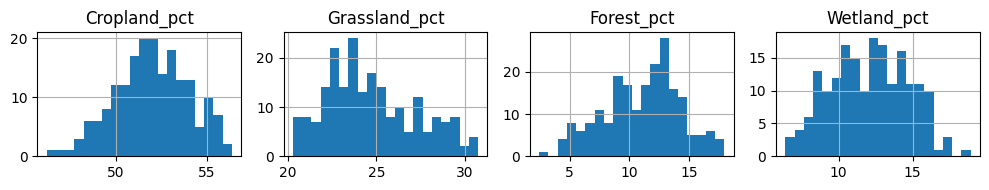

In [135]:
import matplotlib.pyplot as plt

# Plot the distribution of Cropland_pct, Grassland_pct, Forest_pct, and Wetland_pct
df[['Cropland_pct', 'Grassland_pct', 'Forest_pct', 'Wetland_pct']].hist(bins=20, figsize=(10, 2), layout=(1, 4))

plt.tight_layout()
plt.show()

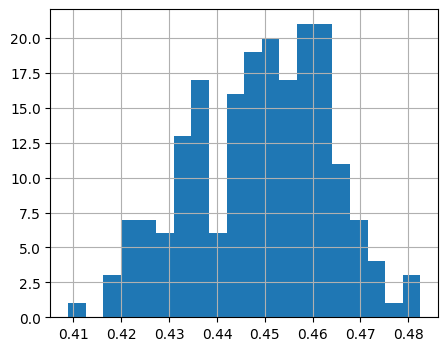

In [136]:
# Plot the distribution of Biodiversity_Score
df['Biodiversity_Score'].hist(bins=20, figsize=(5, 4))
plt.show()

In [137]:
# Missing data that was not resolved:
# Biodiversity_Score for the year 2010 (all subdivisions)
# Cropland_pct and Cropland_area for Subdivision 2 (all years)
# Wetland_pct and Wetland_area for Subdivision 2 (all years)

# Export the cleaned dataframe to the data/processed folder
processed_file_path = '../data/processed/cleaned_land_use_data.csv'
df.to_csv(processed_file_path, index=False)